# Data Analysis of Google App's Rating

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
googledata= pd.read_csv("googleplaystore.csv")
googledata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
type(googledata)  #pandas dataframe

pandas.core.frame.DataFrame

In [4]:
googledata.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
googledata.shape #rows and columns

(10841, 13)

In [6]:
googledata.describe()  #Summary Statistics


#central limit theorem is applied to only 1 column which is numeric

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


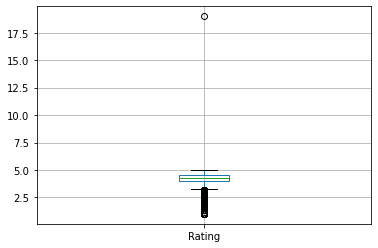

In [7]:
googledata.boxplot()

#box plot shows that we have an oulier with a rating over 5 (over 17.5)

In [31]:
# googledata.boxplot(whis=19)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D058C277F0>]],
      dtype=object)

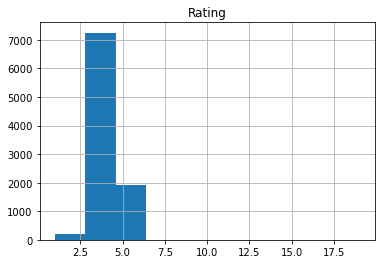

In [35]:
googledata.hist()

#histogram does not show clearly but gives an indication of left skewed data.

In [33]:
# print(dir(plt))
# print(dir(sns))

In [36]:
#to find missing values 

googledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

In [37]:
#seeing the missing values in dataframe
googledata.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
#find the sum of missing values

googledata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [45]:
# Check how many rating are above 5 rating i.e outlier

googledata[googledata.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [46]:
googledata.drop(10472, inplace=True)   #dropping the outlier, using inplace=true to make changes to the same dataframe

In [49]:
googledata[googledata.Rating > 5]  #checking if the row is deleted by using the same condition

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [52]:
googledata[10470:10475]  # alternative way to check the row in the range to see if row is deleted or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


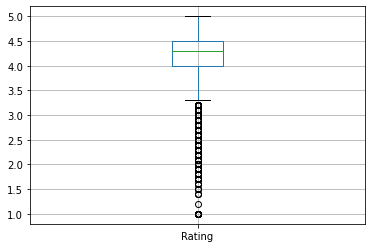

In [56]:
googledata.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D05854F4F0>]],
      dtype=object)

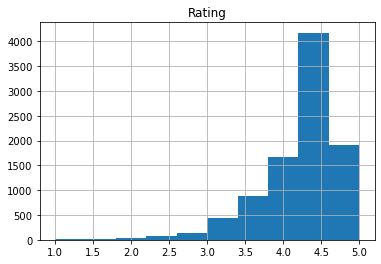

In [57]:
googledata.hist()

# histogram now clearly shows the data is left skewed (tail is on the left side)

In [58]:
# for skewed data we generally prefer to use median instead of mean because the skewed data can affect the mean
# and it will not give the correct center while median is not much affected by skewness

#so next step is to fill the blank rows with median values

##### Remove Columns that are 90% empty

In [63]:
#setting the threshold of data
threshold= len(googledata)*0.1  #10% of row =10840
threshold

# Note: this step not necessary for this dataset,as we have columns with 90 % value in them, 
# but there are datasets where 90% data is missing, hence we would drop that column and not use it in analysis 
# as there is scarcity of data in that column

1084.0

In [64]:
#now i would want to drop that particular column which has values less than threshold.

googledata.dropna(thresh=threshold, axis=1, inplace=True)

In [65]:
googledata.isnull().sum()

#Checking the remaining  columns to find non of columns have been dropped 
#this is because all of them have values greater than the threshold

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [67]:
googledata.shape

(10840, 13)

### Data Imputation and Manipulation

###### Fill null values with appropriate values using aggregate functions such as mean, median or mode

In [68]:
#for categorical values, will use mode
#for numerical values, will use median and not mean as dataset is skewed 

In [69]:
#define a function impute median to fill NA with the column's median supplied to each column passed as a series

def impute_median(series):
    return series.fillna(series.median())

In [70]:
googledata.Rating=googledata['Rating'].transform(impute_median)

#Removing NA from Rating column with the median
#transform does the transformation/function/operations mentioned in the parenthesis

In [71]:
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [74]:
#modes for categorical values

print(googledata['Type'].mode())
print(googledata['Current Ver'].mode())
print(googledata['Android Ver'].mode())

#data can also be bimodal instead of just unimodal. In this case only unimodal is there

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [76]:
# fill the missing categorical values with their respective modes

googledata['Type'].fillna(str(googledata['Type'].mode().values[0]),inplace=True)
googledata['Current Ver'].fillna(str(googledata['Current Ver'].mode().values[0]),inplace=True)
googledata['Android Ver'].fillna(str(googledata['Android Ver'].mode().values[0]),inplace=True)


#mode().values[0] means first mode value in case if the colummn was bimodal
#since these are categorical values hence typecasting/encapsulating it to string

In [78]:
googledata.isnull().sum() #no null data left, all values are filled

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###### Convert Price,Reviews and Installs to Numerical Values to be able to perform data analysis

In [86]:
# since price has dollar sign so it's a string
# in first step will remove dollar from the string value wherever it is present using replace method in lambda fn
# in second step will convert the string to float

googledata['Price']=googledata['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
googledata['Price']=googledata['Price'].apply(lambda x: float(x))

In [88]:
# since reviews are already just numbers in them, will directly convert to numberic using pandas method to_numeric

googledata['Reviews']=pd.to_numeric(googledata['Reviews'],errors='coerce')

#coerce ignores any error while conversion to numeric

In [89]:
# installs have commas between the nums and + sign (10,000+) which needs to be removed to convert it into numeric

googledata['Installs']=googledata['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else str(x))
googledata['Installs']=googledata['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))
googledata['Installs']=pd.to_numeric(googledata['Installs'],errors='coerce')

In [90]:
googledata.head(10)   # to check if the chnanges have been done on the columns or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [91]:
googledata.describe()   # Summary Stats to re verify if the columns have been converted to numeric properly or not

#central limit theorem is applied to all 4 columns

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Visualization

In [97]:
grp=googledata.groupby('Category')

x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)

print('Mean of Rating',x)
print('Sum of Prices',y)
print('Mean of Reviews',z)

Mean of Rating Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL

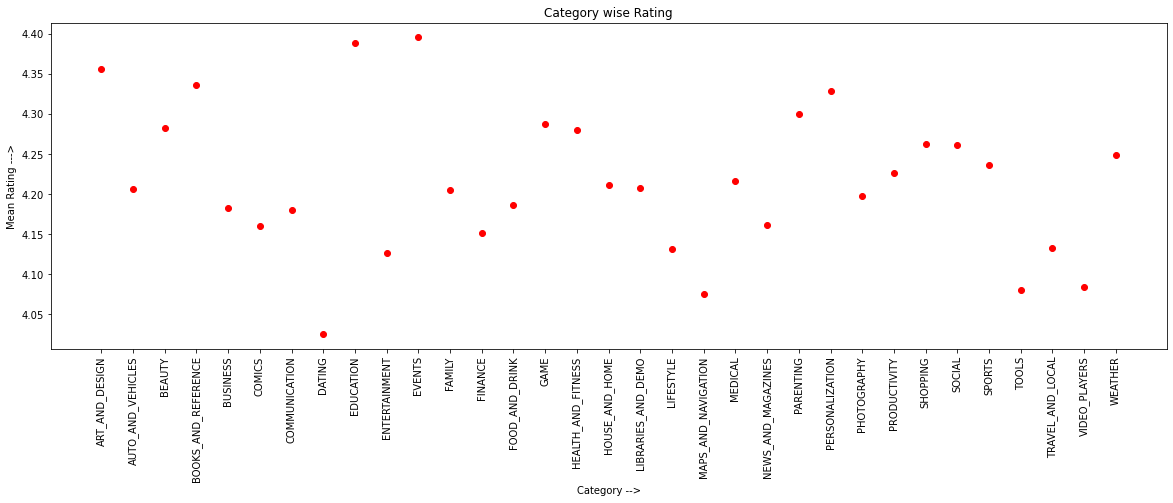

In [125]:
plt.figure(figsize=(20,6))
# plt.subplots(figsize=(20,6))
plt.plot(x,'ro',color='r')
plt.xticks(rotation=90)

plt.title('Category wise Rating')
plt.xlabel('Category -->')
plt.ylabel('Mean Rating --->')
plt.show()

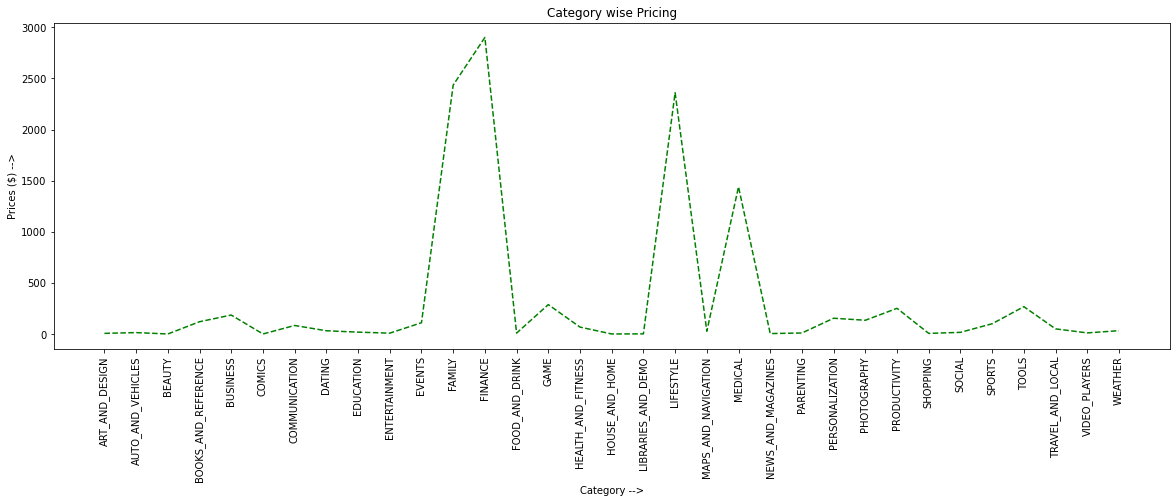

In [135]:
plt.subplots(figsize=(20,6))
plt.plot(y,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Category -->')
plt.ylabel('Prices ($) -->')
plt.show()


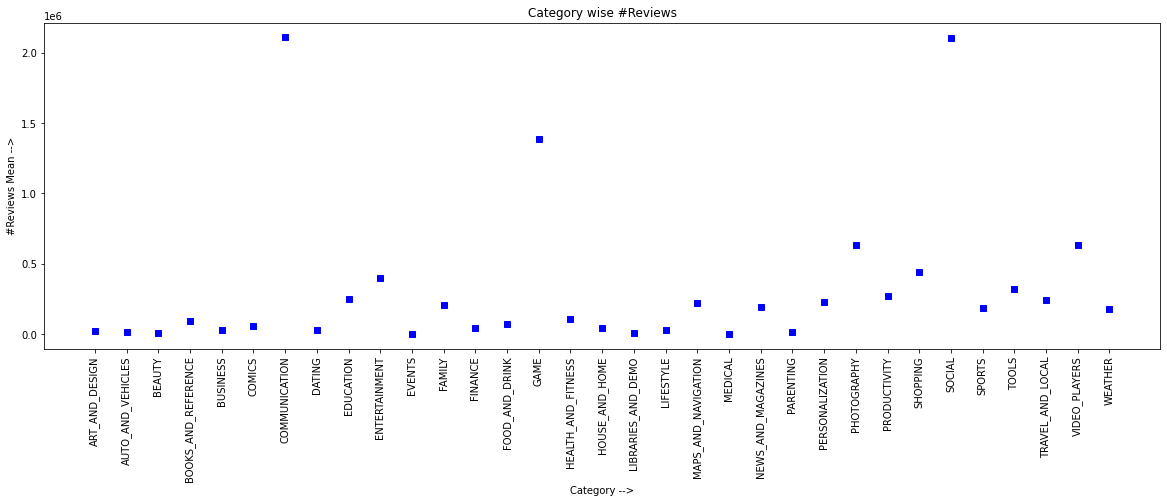

In [151]:
plt.subplots(figsize=(20,6))
plt.plot(z,'bs',color='b')
# plt.plot(z,'g^',color='b')
plt.xticks(rotation=90)
plt.title('Category wise #Reviews')
plt.xlabel('Category -->')
plt.ylabel('#Reviews Mean -->')
plt.show()